In [7]:
# import os
# import shutil
# import random

# # Thư mục gốc dataset
# root_dir = "/kaggle/input/snakevn/VietNam_Snake_DataLast"
# output_dir = "/kaggle/working/data"  # nơi lưu sau khi chia

# # Tỉ lệ chia
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# # Tạo thư mục output
# for split in ["train", "val", "test"]:
#     split_dir = os.path.join(output_dir, split)
#     os.makedirs(split_dir, exist_ok=True)

# # Hàm lấy toàn bộ ảnh trong class (kể cả folder con)
# def get_all_images_in_class(class_dir):
#     image_files = []
#     for root, dirs, files in os.walk(class_dir):
#         for f in files:
#             if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
#                 image_files.append(os.path.join(root, f))
#     return image_files

# # Lặp qua từng class folder
# for class_name in os.listdir(root_dir):
#     class_dir = os.path.join(root_dir, class_name)
#     if not os.path.isdir(class_dir):
#         continue

#     images = get_all_images_in_class(class_dir)

#     if len(images) == 0:
#         print(f"⚠️ Class {class_name} không có ảnh, bỏ qua.")
#         continue

#     random.shuffle(images)

#     n_total = len(images)
#     n_train = int(train_ratio * n_total)
#     n_val = int(val_ratio * n_total)
#     n_test = n_total - n_train - n_val

#     train_files = images[:n_train]
#     val_files = images[n_train:n_train+n_val]
#     test_files = images[n_train+n_val:]

#     for split, split_files in zip(["train", "val", "test"], [train_files, val_files, test_files]):
#         split_class_dir = os.path.join(output_dir, split, class_name)
#         os.makedirs(split_class_dir, exist_ok=True)
#         for src in split_files:
#             dst = os.path.join(split_class_dir, os.path.basename(src))
#             shutil.copy2(src, dst)

# print("✅ Done! Dataset đã được chia vào thư mục '/kaggle/working/data/train', 'val', 'test'")


In [8]:
# import os

# def count_images_in_folder(folder_path, exts={'.jpg', '.jpeg', '.png', '.bmp', '.gif'}):
#     count = 0
#     for root, dirs, files in os.walk(folder_path):
#         for file in files:
#             if os.path.splitext(file)[1].lower() in exts:
#                 count += 1
#     return count

# # Cập nhật đường dẫn thư mục để đếm ảnh đã resize
# folder = "/kaggle/input/snakevn/VietNam_Snake_DataLast"
# print(f"Tổng số ảnh trong thư mục đã resize: {count_images_in_folder(folder)}")

# print("\nThư mục con có dưới 50 ảnh:")
# low_image_folders = []
# for subdir in os.listdir(folder):
#     subpath = os.path.join(folder, subdir)
#     if os.path.isdir(subpath):
#         count = count_images_in_folder(subpath)
#         if  count < 50:
#             low_image_folders.append((subdir, count))

# if low_image_folders:
#     for subdir, count in low_image_folders:
#         print(f"- {subdir}: {count}")
#     print(f"\nTổng số thư mục con có dưới 50 ảnh: {len(low_image_folders)}")
# else:
#     print("Không có thư mục nào có dưới 50 ảnh.")

In [9]:
# import os
# import hashlib
# from collections import defaultdict

# # Thư mục dataset
# data_root = "/kaggle/working/data"

# def file_hash(path):
#     h = hashlib.md5()
#     with open(path, "rb") as f:
#         for chunk in iter(lambda: f.read(4096), b""):
#             h.update(chunk)
#     return h.hexdigest()

# # 1. Tạo hash cho train
# train_hashes = {}
# for root, dirs, files in os.walk(os.path.join(data_root, "train")):
#     for f in files:
#         if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
#             path = os.path.join(root, f)
#             h = file_hash(path)
#             train_hashes[h] = path  # chỉ giữ 1 path đại diện trong train

# # 2. So sánh val/test với train
# leak_dict = defaultdict(list)
# for split in ["val", "test"]:
#     split_dir = os.path.join(data_root, split)
#     for root, dirs, files in os.walk(split_dir):
#         for f in files:
#             if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
#                 path = os.path.join(root, f)
#                 h = file_hash(path)
#                 if h in train_hashes:  # nếu hash trùng với ảnh train
#                     leak_dict[h].append((train_hashes[h], path))

# # 3. Báo cáo leak
# print(f"🔎 Tổng số nhóm leak (val/test vs train): {len(leak_dict)}\n")

# for h, pairs in leak_dict.items():
#     print(f"--- Hash: {h} ---")
#     for p in pairs:
#         print(f"Train: {p[0]}")
#         print(f"Leak : {p[1]}")
#         print()

# # 4. Xoá ảnh leak trong val/test
# delete_count = 0
# for h, pairs in leak_dict.items():
#     for train_path, leak_path in pairs:
#         try:
#             os.remove(leak_path)
#             delete_count += 1
#             print(f"🗑️ Deleted leak: {leak_path}")
#         except Exception as e:
#             print(f"❌ Error deleting {leak_path}: {e}")

# print(f"\n✅ Đã xoá {delete_count} ảnh leak khỏi val/test.\n")

# # 5. Check lại sau khi xoá
# leak_dict_check = defaultdict(list)
# for split in ["val", "test"]:
#     split_dir = os.path.join(data_root, split)
#     for root, dirs, files in os.walk(split_dir):
#         for f in files:
#             if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
#                 path = os.path.join(root, f)
#                 h = file_hash(path)
#                 if h in train_hashes:
#                     leak_dict_check[h].append((train_hashes[h], path))

# print(f"🔎 Sau khi xoá, số nhóm leak còn lại: {len(leak_dict_check)}")


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import time
import copy
import os
from torchvision.transforms import AutoAugment, AutoAugmentPolicy, RandAugment

# =========================
# 1. Config
# =========================
data_dir = "/kaggle/working/data"   # Cấu trúc thư mục: data/train, data/val
num_classes = 124
batch_size = 32
num_epochs = 30
lr = 5e-5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================
# 2. Data Augmentation
# =========================
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), train_transform),
    'val': datasets.ImageFolder(os.path.join(data_dir, 'val'), val_transform)
}

dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# =========================
# 3. Model
# =========================
model = models.swin_s(weights="IMAGENET1K_V1")  # pretrained Swin-Small
model.head = nn.Linear(model.head.in_features, num_classes)
model = model.to(device)

# =========================
# 4. Loss, Optimizer, Scheduler
# =========================
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# ================================
# 5. Checkpoint helpers
# ================================
def save_checkpoint(model, optimizer, scheduler, epoch, history, path):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'history': history
    }
    torch.save(checkpoint, path)
    print(f"✅ Saved checkpoint at {path}")

def load_checkpoint(model, optimizer, scheduler, path, device):
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    epoch = checkpoint['epoch']
    history = checkpoint['history']
    print(f"✅ Loaded checkpoint from {path} (epoch {epoch})")
    return model, optimizer, scheduler, epoch, history

# =========================
# 6. Training Loop
# =========================
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": []
    }
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 20)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double().item() / dataset_sizes[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Lưu history
            history[f"{phase}_loss"].append(epoch_loss)
            history[f"{phase}_acc"].append(epoch_acc)
            
            # Save best model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                save_checkpoint(model, optimizer, scheduler, epoch+1, history, "/kaggle/working/best_checkpoint.pth")
        
        # Lưu checkpoint mỗi 5 epoch
        if (epoch + 1) % 5 == 0:
            save_checkpoint(model, optimizer, scheduler, epoch+1, history, f"/kaggle/working/checkpoint_epoch{epoch+1}.pth")
        
        print()
    
    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history

# =========================
# 7. Run Training
# =========================
model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs)

# Save final best model
torch.save(model.state_dict(), "/kaggle/working/swin_tiny_best.pth")
print("✅ Training complete and best model saved.")


Epoch 1/30
--------------------
train Loss: 2.6927 Acc: 0.4791
val Loss: 1.6623 Acc: 0.7391
✅ Saved checkpoint at /kaggle/working/best_checkpoint.pth

Epoch 2/30
--------------------
train Loss: 1.8099 Acc: 0.7079
val Loss: 1.4832 Acc: 0.7990
✅ Saved checkpoint at /kaggle/working/best_checkpoint.pth

Epoch 3/30
--------------------
train Loss: 1.6098 Acc: 0.7705
val Loss: 1.3213 Acc: 0.8477
✅ Saved checkpoint at /kaggle/working/best_checkpoint.pth

Epoch 4/30
--------------------
train Loss: 1.4858 Acc: 0.8083
val Loss: 1.2818 Acc: 0.8629
✅ Saved checkpoint at /kaggle/working/best_checkpoint.pth

Epoch 5/30
--------------------
train Loss: 1.4079 Acc: 0.8322
val Loss: 1.2494 Acc: 0.8725
✅ Saved checkpoint at /kaggle/working/best_checkpoint.pth
✅ Saved checkpoint at /kaggle/working/checkpoint_epoch5.pth

Epoch 6/30
--------------------
train Loss: 1.3537 Acc: 0.8469
val Loss: 1.1930 Acc: 0.8872
✅ Saved checkpoint at /kaggle/working/best_checkpoint.pth

Epoch 7/30
--------------------
tr

KeyboardInterrupt: 

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


# =========================
# 7. Evaluation on Test Set
# =========================
# Load lại test dataset
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), val_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Lấy mapping index -> class name
class_names = test_dataset.classes
num_classes = len(class_names)

# Load best model đã save
model = models.swin_s(weights=None)
model.head = nn.Linear(model.head.in_features, num_classes)
model = model.to(device)

# --- Load checkpoint ---
checkpoint_path = "/kaggle/working/best_checkpoint.pth"  # thay bằng checkpoint bạn muốn
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Cách thuần tuý
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# =========================
# 8. Tính accuracy
# =========================
overall_acc = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {overall_acc:.4f}")

# =========================
# 9. Accuracy từng class
# =========================
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

print("\nAccuracy theo từng class:")
for i, class_name in enumerate(class_names):
    idx = (all_labels == i)
    if np.sum(idx) == 0:
        acc = 0.0
    else:
        acc = np.mean(all_preds[idx] == all_labels[idx])
    correct = np.sum(all_preds[idx] == all_labels[idx])
    total = np.sum(idx)
    print(f"{class_name:25s}  Acc: {acc:.4f}  ({correct}/{total})")

# =========================
# 10. Classification Report (optional)
# =========================
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))


Test Accuracy: 0.9300

Accuracy theo từng class:
Achalinus_rufescens        Acc: 1.0000  (13/13)
Achalinus_spinalis         Acc: 0.9286  (13/14)
Acrochordus_granulatus     Acc: 0.9767  (42/43)
Acrochordus_javanicus      Acc: 0.8750  (7/8)
Ahaetulla_fusca            Acc: 0.9259  (25/27)
Ahaetulla_prasina          Acc: 1.0000  (20/20)
Ahaetulla_rufusoculara     Acc: 1.0000  (9/9)
Amphiesma_stolatum         Acc: 0.9474  (72/76)
Blue-lipped_sea_krait      Acc: 0.9634  (79/82)
Boiga_cyanea               Acc: 0.9620  (76/79)
Boiga_guangxiensis         Acc: 0.7500  (6/8)
Boiga_jaspidea             Acc: 0.9756  (40/41)
Boiga_kraepelini           Acc: 0.9552  (64/67)
Boiga_multomaculata        Acc: 0.9800  (98/100)
Boiga_siamensis            Acc: 0.9032  (28/31)
Bungarus_candidus          Acc: 0.9577  (68/71)
Bungarus_fasciatus         Acc: 1.0000  (86/86)
Calamaria_septentrionalis  Acc: 0.8182  (18/22)
Calliophis_maculiceps      Acc: 0.9444  (17/18)
Calloselasma_rhodostoma    Acc: 0.9706  (99

In [ ]:
# Kỹ thuật post-processing

# Cách 1 : Softmax Temperature Scaling
# import torch.nn.functional as F

# T = 2.0  # Temperature
# all_labels = []
# all_preds = []

# model.eval()
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         logits = model(inputs)
#         probs = F.softmax(logits / T, dim=1)  # áp dụng temperature
#         preds = torch.argmax(probs, dim=1)

#         all_labels.extend(labels.cpu().numpy())
#         all_preds.extend(preds.cpu().numpy())

#Cách 2 :  Thresholding (cho multi-class / multi-label, single-label thì có thể bỏ hoặc dùng soft-threshold)
# threshold = 0.5  # Chỉ chấp nhận dự đoán nếu xác suất > 0.5
# all_labels = []
# all_preds = []

# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)
        
#         logits = model(inputs)
#         probs = F.softmax(logits, dim=1)

#         # Lấy prediction max nếu xác suất > threshold
#         max_probs, max_idx = torch.max(probs, dim=1)
#         preds = torch.where(max_probs > threshold, max_idx, torch.tensor(-1).to(device))  # -1 = unknown

#         all_labels.extend(labels.cpu().numpy())
#         all_preds.extend(preds.cpu().numpy())

#Cách3 : Test-Time Augmentation (TTA)
# from torchvision import transforms

# tta_transforms = [
#     transforms.Compose([]),  # original
#     transforms.Compose([transforms.RandomHorizontalFlip(p=1.0)]),
#     transforms.Compose([transforms.RandomVerticalFlip(p=1.0)])
# ]

# all_labels = []
# all_preds = []

# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         tta_probs = []
#         for tfm in tta_transforms:
#             aug_inputs = tfm(inputs)  # áp dụng TTA
#             logits = model(aug_inputs)
#             probs = F.softmax(logits, dim=1)
#             tta_probs.append(probs)
        
#         avg_probs = torch.stack(tta_probs).mean(dim=0)
#         preds = torch.argmax(avg_probs, dim=1)

#         all_labels.extend(labels.cpu().numpy())
#         all_preds.extend(preds.cpu().numpy())


🏆 Best Validation Accuracy: 0.9324 (Epoch 26)


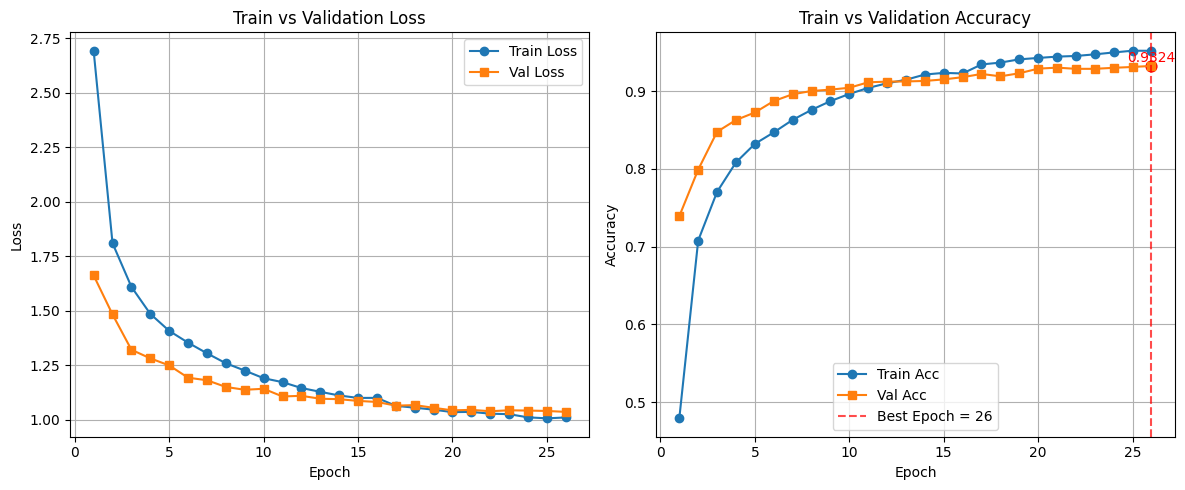

In [17]:
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================
# 1. Load checkpoint
# =========================
checkpoint_path = "/kaggle/working/best_checkpoint.pth"
checkpoint = torch.load(checkpoint_path, map_location=device)
history = checkpoint['history']

# =========================
# 2. Tạo biến epoch & tìm best acc
# =========================
train_acc = history["train_acc"]
val_acc = history["val_acc"]
train_loss = history["train_loss"]
val_loss = history["val_loss"]

epochs = range(1, len(train_acc) + 1)
best_val_acc = max(val_acc)
best_epoch = np.argmax(val_acc) + 1

print(f"🏆 Best Validation Accuracy: {best_val_acc:.4f} (Epoch {best_epoch})")

# =========================
# 3. Vẽ Loss và Accuracy
# =========================
plt.figure(figsize=(12,5))

# --- Loss ---
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'o-', label="Train Loss")
plt.plot(epochs, val_loss, 's-', label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid(True)

# --- Accuracy ---
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'o-', label="Train Acc")
plt.plot(epochs, val_acc, 's-', label="Val Acc")
plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.7, label=f"Best Epoch = {best_epoch}")
plt.scatter(best_epoch, best_val_acc, color='red', s=60)
plt.text(best_epoch, best_val_acc + 0.005, f"{best_val_acc:.4f}", color='red', ha='center')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
print("\n⚠️ Các class dưới 70% accuracy:")
for i, class_name in enumerate(class_names):
    idx = (all_labels == i)
    if np.sum(idx) == 0:
        acc = 0.0
        correct, total = 0, 0
    else:
        acc = np.mean(all_preds[idx] == all_labels[idx])
        correct = np.sum(all_preds[idx] == all_labels[idx])
        total = np.sum(idx)

    if acc < 0.7:  # dưới 70%
        print(f"{class_name:25s}  Acc: {acc:.4f}  ({correct}/{total})")



⚠️ Các class dưới 70% accuracy:
Erpeton_tentaculatum       Acc: 0.4444  (4/9)
Fordonia_leucobalia        Acc: 0.6250  (5/8)
Hebius_khasiensis          Acc: 0.6000  (3/5)
Homalopsis_mereljcoxi      Acc: 0.6429  (9/14)
Lycodon_chapaensis         Acc: 0.6000  (6/10)
Lycodon_truongi            Acc: 0.6250  (5/8)
Naja_fuxi                  Acc: 0.6000  (6/10)
Oligodon_cyclurus          Acc: 0.6000  (6/10)
Pareas_hamptoni            Acc: 0.4286  (3/7)
Sinomicrurus_peinani       Acc: 0.5000  (4/8)
Trimeresurus_albolabris    Acc: 0.6875  (11/16)


In [23]:
import torch
from torchvision import transforms, datasets, models
from PIL import Image
import requests
from io import BytesIO
import os

# =====================
# 1. Cấu hình
# =====================
num_classes = 124
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =====================
# 2. Load model
# =====================
model = models.swin_s(weights=None)
model.head = nn.Linear(model.head.in_features, num_classes)
model = model.to(device)

# --- Load checkpoint ---
checkpoint_path = "/kaggle/working/best_checkpoint.pth"  # thay bằng checkpoint bạn muốn
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# =====================
# 3. Transform
# =====================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# =====================
# 4. Lấy class_names từ folder train
# =====================
data_dir = "/kaggle/working/data"
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'))
class_names = train_dataset.classes

# =====================
# 5. Hàm dự đoán
# =====================
def predict_from_url(url, class_names):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.softmax(outputs, dim=1)
        pred_idx = torch.argmax(probs, dim=1).item()

    print(f"Predicted class: {class_names[pred_idx]} (prob = {probs[0][pred_idx]:.4f})")
    return class_names[pred_idx]

# =====================
# 6. Ví dụ sử dụng
# =====================
url = "https://vietnamsnakes.com/storage/snakes/species/46/1748341202_0.jpg"
predict_from_url(url, class_names)


Predicted class: Bungarus_fasciatus (prob = 0.9277)


'Bungarus_fasciatus'